In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import pytesseract
# from pytesseract import Output

from ultralyticsplus import YOLO, render_result
from PIL import Image
import deepdoctection as dd
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
# from paddleocr import PaddleOCR, draw_ocr 
from matplotlib import pyplot as plt 
import cv2 
from pathlib import Path
import os
from IPython.core.display import HTML
from bs4 import BeautifulSoup


c:\Users\kortb\Desktop\BFI\env\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[0429 19:18.46 @file_utils.py:36]  INF  PyTorch version 2.2.2 available.


In [2]:
os.environ["PATH"] = rf"C:\Users\kortb\Downloads\Release-24.02.0-0\poppler-24.02.0\Library\bin"


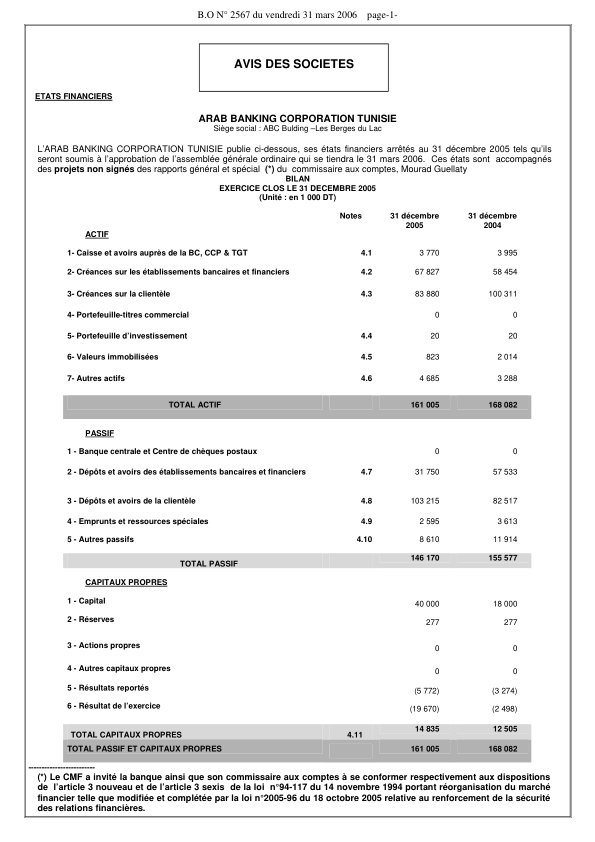

In [3]:
# image = 'ABC_EFD3112_2005_page_1.png'

image = 'ABC_EFD3112_2005_page_1.png'

img = Image.open(image)
img

In [4]:
model = YOLO('keremberke/yolov8m-table-extraction')

# set model parameters
model.overrides['conf'] = 0.25  
model.overrides['iou'] = 0.45  
model.overrides['agnostic_nms'] = False  
model.overrides['max_det'] = 1000 

Boxes:  ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 0., 1.])
conf: tensor([0.7247, 0.5755, 0.3130])
data: tensor([[6.3629e+01, 2.0608e+02, 5.2099e+02, 4.0920e+02, 7.2469e-01, 1.0000e+00],
        [1.9700e+02, 3.9250e+01, 3.8962e+02, 9.2152e+01, 5.7545e-01, 0.0000e+00],
        [6.3339e+01, 4.2277e+02, 5.2865e+02, 7.5438e+02, 3.1296e-01, 1.0000e+00]])
id: None
is_track: False
orig_shape: (842, 595)
shape: torch.Size([3, 6])
xywh: tensor([[292.3080, 307.6399, 457.3571, 203.1123],
        [293.3127,  65.7007, 192.6178,  52.9021],
        [295.9944, 588.5741, 465.3112, 331.6101]])
xywhn: tensor([[0.4913, 0.3654, 0.7687, 0.2412],
        [0.4930, 0.0780, 0.3237, 0.0628],
        [0.4975, 0.6990, 0.7820, 0.3938]])
xyxy: tensor([[ 63.6294, 206.0838, 520.9866, 409.1961],
        [197.0038,  39.2497, 389.6216,  92.1518],
        [ 63.3388, 422.7690, 528.6500, 754.3792]])
xyxyn: tensor([[0.1069, 0.2448, 0.8756, 0.4860],
        [0.3311, 0.0466, 0.6548, 0.1094],
   

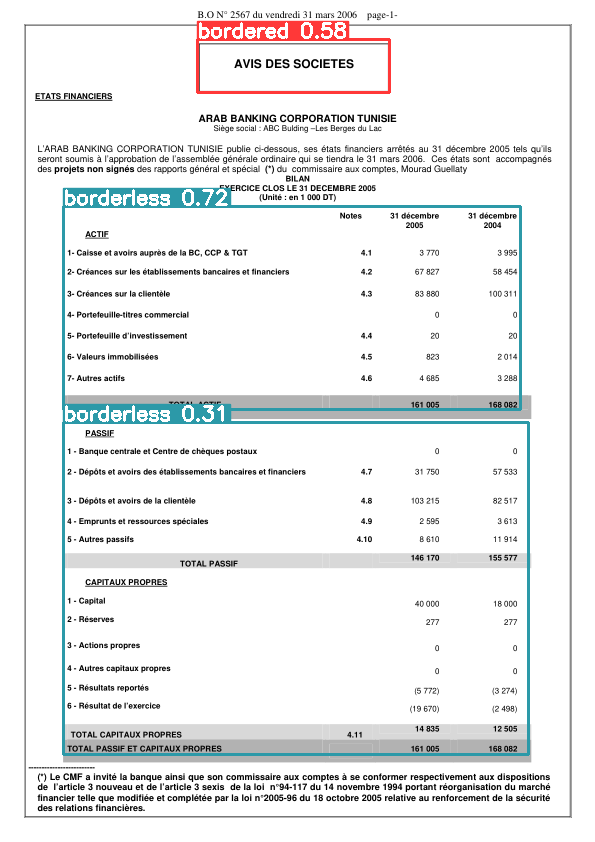

In [5]:
results = model.predict(img)

print('Boxes: ', results[0].boxes)
render = render_result(model=model, image=img, result=results[0])
render

In [6]:
for box in results[0].boxes.data.numpy():
    print("Box shape:", box.shape)

Box shape: (6,)
Box shape: (6,)
Box shape: (6,)


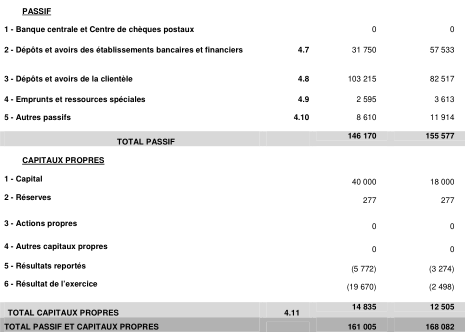

In [10]:
x1, y1, x2, y2, _, _ = tuple(int(item) for item in results[0].boxes.data.numpy()[2])
img = np.array(Image.open(image))
#cropping
cropped_image = img[y1:y2, x1:x2]
cropped_image = Image.fromarray(cropped_image)
cropped_image

In [11]:
results[0].boxes[2]

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.])
conf: tensor([0.3130])
data: tensor([[6.3339e+01, 4.2277e+02, 5.2865e+02, 7.5438e+02, 3.1296e-01, 1.0000e+00]])
id: None
is_track: False
orig_shape: (842, 595)
shape: torch.Size([1, 6])
xywh: tensor([[295.9944, 588.5741, 465.3112, 331.6101]])
xywhn: tensor([[0.4975, 0.6990, 0.7820, 0.3938]])
xyxy: tensor([[ 63.3388, 422.7690, 528.6500, 754.3792]])
xyxyn: tensor([[0.1065, 0.5021, 0.8885, 0.8959]])

In [12]:
original_image = cv2.imread('abc_efd311216_page_7.png')

box = results[0].boxes[2].xyxy  
print(box)

x1, y1, x2, y2 = map(int, box[0])

cropped_image = original_image[y1:y2, x1:x2]

cv2.imwrite('cropped_table.jpeg', cropped_image)

tensor([[ 63.3388, 422.7690, 528.6500, 754.3792]])


True

In [13]:
import os
import json

# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt



doc = DocumentFile.from_images("cropped_table.jpeg")
print(f"Number of pages: {len(doc)}")

Number of pages: 1


In [14]:
# predictor = PaddleOCR(use_gpu=False,lang='french')
# result = predictor.ocr('cropped_table.jpeg', cls=True)


In [16]:
predictor = ocr_predictor(pretrained=True)

result = predictor(doc)

[0429 19:20.20 @data.py:92]  INF  Using downloaded & verified file: C:\Users\kortb\.cache\doctr\models\db_resnet50-79bd7d70.pt
[0429 19:20.22 @data.py:92]  INF  Using downloaded & verified file: C:\Users\kortb\.cache\doctr\models\crnn_vgg16_bn-9762b0b0.pt


In [17]:
result

Document(
  (pages): [Page(
    dimensions=(332, 465)
    (blocks): [
      Block(
        (lines): [Line(
          (words): [Word(value='Libelle', confidence=0.66)]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='31-déc-2016', confidence=0.55),
            Word(value='31-déc-2015', confidence=0.68),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [
          Line(
            (words): [
              Word(value='courants', confidence=1.0),
              Word(value='debiteurs', confidence=1.0),
            ]
          ),
          Line(
            (words): [
              Word(value='a', confidence=0.5),
              Word(value='commercial', confidence=0.73),
            ]
          ),
          Line(
            (words): [
              Word(value='Court', confidence=1.0),
              Word(value='Terme', confidence=0.71),
            ]
          ),
          Line(
 

In [18]:
json_export = result.export()
json_export

{'pages': [{'page_idx': 0,
   'dimensions': (332, 465),
   'orientation': {'value': None, 'confidence': None},
   'language': {'value': None, 'confidence': None},
   'blocks': [{'geometry': ((0.2158203125, 0.022646249058734913),
      (0.28125, 0.048633989081325324)),
     'lines': [{'geometry': ((0.2158203125, 0.022646249058734913),
        (0.28125, 0.048633989081325324)),
       'words': [{'value': 'Libelle',
         'confidence': 0.6606405973434448,
         'geometry': ((0.2158203125, 0.022646249058734913),
          (0.28125, 0.048633989081325324))}]}],
     'artefacts': []},
    {'geometry': ((0.5859375, 0.021278473268072307),
      (0.8564453125, 0.05136954066265059)),
     'lines': [{'geometry': ((0.5859375, 0.021278473268072307),
        (0.8564453125, 0.05136954066265059)),
       'words': [{'value': '31-déc-2016',
         'confidence': 0.5520850419998169,
         'geometry': ((0.5859375, 0.021278473268072307),
          (0.7138671875, 0.05000176487198793))},
        {'va

In [19]:


# Instantiate a pretrained model
#
# JSON export
json_export = result.export()

def remove_fields(obj, fields):
    if isinstance(obj, list):
        for item in obj:
            remove_fields(item, fields)
    elif isinstance(obj, dict):
        for key in list(obj.keys()):
            if key in fields:
                del obj[key]
            else:
                remove_fields(obj[key], fields)

# def remove_geometry(data):
#     if isinstance(data, list):
#         for item in data:
#             remove_geometry(item)
#     elif isinstance(data, dict):
#         if 'geometry' in data:
#             del data['geometry']
#         for key, value in data.items():
#             remove_geometry(value)

fields_to_remove = ['confidence', 'page_idx', 'dimensions', 'orientation', 'language', 'artefacts']

remove_fields(json_export, fields_to_remove)

for page in json_export['pages']:
    for block in page['blocks']:
        if 'geometry' in block:
            del block['geometry']
        for line in block.get('lines', []):
            if 'geometry' in line:
                del line['geometry']

modified_json = json.dumps(json_export, separators=(',', ':'),ensure_ascii=False)

print(modified_json)

output_file_path = "OCR_Result2.json"

with open(output_file_path, "w",encoding="utf-8") as output_file:
    output_file.write(modified_json)

print(f"Modified JSON data saved to {output_file_path}")

{"pages":[{"blocks":[{"lines":[{"words":[{"value":"Libelle","geometry":[[0.2158203125,0.022646249058734913],[0.28125,0.048633989081325324]]}]}]},{"lines":[{"words":[{"value":"31-déc-2016","geometry":[[0.5859375,0.021278473268072307],[0.7138671875,0.05000176487198793]]},{"value":"31-déc-2015","geometry":[[0.728515625,0.021278473268072307],[0.8564453125,0.05136954066265059]]}]}]},{"lines":[{"words":[{"value":"courants","geometry":[[0.0048828125,0.06367952277861444],[0.080078125,0.08829948701054219]]},{"value":"debiteurs","geometry":[[0.083984375,0.06231174698795183],[0.1650390625,0.08693171121987953]]}]},{"words":[{"value":"a","geometry":[[0.0,0.1033450207078313],[0.01171875,0.1265972091490964]]},{"value":"commercial","geometry":[[0.013671875,0.10060946912650603],[0.109375,0.1265972091490964]]}]},{"words":[{"value":"Court","geometry":[[0.00390625,0.14164274284638556],[0.0556640625,0.17173381024096385]]},{"value":"Terme","geometry":[[0.056640625,0.14164274284638556],[0.1162109375,0.171733

In [20]:
import re

def is_valid_format(date_str):
    # Define the regular expression pattern for the format "DD-MMM-YYYY"
    pattern = r'^\d{2}-\w{3}-\d{4}$'
    
    # Check if the date string matches the pattern
    if re.match(pattern, date_str):
        return True
    else:
        return False

In [21]:
import json

new_file_path = "new_Ocr2.json"
concatenated_values = []

for page in json_export['pages']:
    for block in page['blocks']:
        lines = block["lines"]
        num_lines = len(lines)
        if num_lines > 1:
            for i in range(num_lines - 1):     
                concatenated_value = ""
                current_line = lines[i]
                next_line = lines[i + 1]
                for word in current_line["words"]:
                    concatenated_value += " " + word["value"]
                for word in next_line["words"]:
                    concatenated_value += " " + word["value"]
                concatenated_values.append(concatenated_value.strip()) 
        else:
            for i in range(num_lines):  
                concatenated_value = ""
                current_line = lines[i]
                for word in current_line["words"]:
                    if is_valid_format(word["value"]):
                      concatenated_values.append(word["value"])
                    else:
                      concatenated_value += " " + word["value"]
                    
                concatenated_values.append(concatenated_value.strip())

# Print each concatenation with its index and value
# for idx, value in enumerate(concatenated_values, start=1):
#     print(f"Concatenation {idx}: {value}")

# Prepare the JSON data
new_json_data = {
    "concatenated_values": concatenated_values
}

# Convert JSON data to a string
new_json_string = json.dumps(new_json_data, indent=4, ensure_ascii=False)

# Write the JSON string to a file
with open(new_file_path, "w", encoding="utf-8") as output_file:
    output_file.write(new_json_string)

print("New JSON file created successfully:", new_file_path)


New JSON file created successfully: new_Ocr2.json


In [ ]:
import matplotlib.pyplot as plt

synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()


In [23]:
with open("OCR_Result.txt", "r") as f:
    data = json.load(f)

In [24]:
def extract_values(page_data):
    values = []
    for block in page_data["blocks"]:
        for line in block["lines"]:
            for word in line["words"]:
                values.append(word["value"])
    return values

all_values = []
for page in data["pages"]:
    page_values = extract_values(page)
    all_values.extend(page_values)

In [25]:
from transformers import AutoModelForObjectDetection
model = AutoModelForObjectDetection.from_pretrained("microsoft/table-transformer-detection", revision="no_timm")
print(model.config.id2label)

{0: 'table', 1: 'table rotated'}


In [26]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
print("")

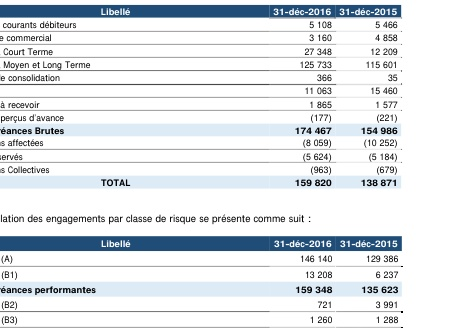

In [27]:
from PIL import Image
from huggingface_hub import hf_hub_download

# let's load an example image
file_path = 'cropped_table.jpeg'
image = Image.open(file_path).convert("RGB")
image

In [28]:
from torchvision import transforms

class MaxResize(object):
    def __init__(self, max_size=800):
        self.max_size = max_size

    def __call__(self, image):
        width, height = image.size
        current_max_size = max(width, height)
        scale = self.max_size / current_max_size
        resized_image = image.resize((int(round(scale*width)), int(round(scale*height))))

        return resized_image

detection_transform = transforms.Compose([
    MaxResize(800),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

pixel_values = detection_transform(image).unsqueeze(0)
pixel_values = pixel_values.to(device)
print(pixel_values.shape)

torch.Size([1, 3, 571, 800])


In [29]:
import torch

with torch.no_grad():
  outputs = model(pixel_values)

print(outputs.logits.shape)

torch.Size([1, 15, 3])


In [30]:
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(-1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h), (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)


def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox)
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b


# update id2label to include "no object"
id2label = model.config.id2label
id2label[len(model.config.id2label)] = "no object"


def outputs_to_objects(outputs, img_size, id2label):
    m = outputs.logits.softmax(-1).max(-1)
    pred_labels = list(m.indices.detach().cpu().numpy())[0]
    pred_scores = list(m.values.detach().cpu().numpy())[0]
    pred_bboxes = outputs['pred_boxes'].detach().cpu()[0]
    pred_bboxes = [elem.tolist() for elem in rescale_bboxes(pred_bboxes, img_size)]

    objects = []
    for label, score, bbox in zip(pred_labels, pred_scores, pred_bboxes):
        class_label = id2label[int(label)]
        if not class_label == 'no object':
            objects.append({'label': class_label, 'score': float(score),
                            'bbox': [float(elem) for elem in bbox]})

    return objects

objects = outputs_to_objects(outputs, image.size, id2label)
print(objects)

[{'label': 'table', 'score': 0.9970429539680481, 'bbox': [0.04720062017440796, 12.052778244018555, 401.0120849609375, 189.9398651123047]}, {'label': 'table', 'score': 0.9996458292007446, 'bbox': [0.037915706634521484, 241.348388671875, 400.93316650390625, 326.55181884765625]}]


In [31]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

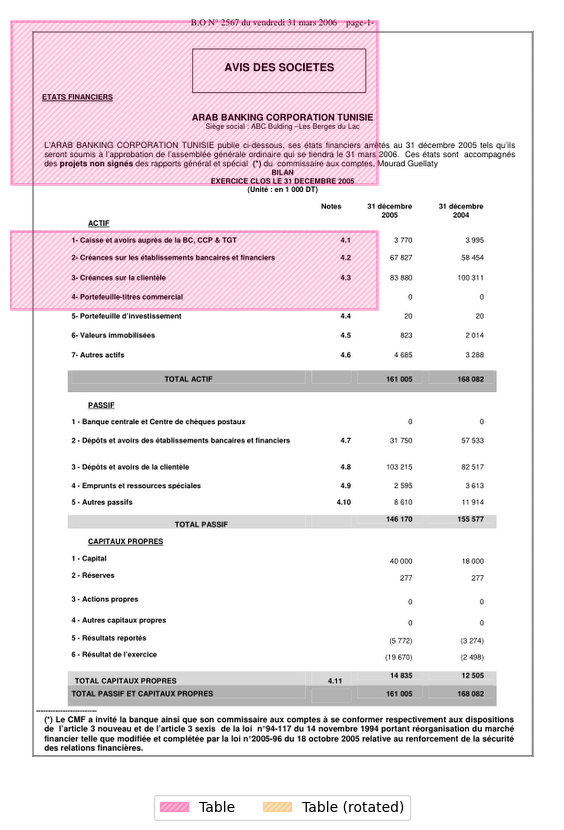

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Patch

def fig2img(fig):
    import io
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    return img


def visualize_detected_tables(img, det_tables, out_path=None):
    plt.imshow(img, interpolation="lanczos")
    fig = plt.gcf()
    fig.set_size_inches(20, 20)
    ax = plt.gca()

    for det_table in det_tables:
        bbox = det_table['bbox']

        if det_table['label'] == 'table':
            facecolor = (1, 0, 0.45)
            edgecolor = (1, 0, 0.45)
            alpha = 0.3
            linewidth = 2
            hatch='//////'
        elif det_table['label'] == 'table rotated':
            facecolor = (0.95, 0.6, 0.1)
            edgecolor = (0.95, 0.6, 0.1)
            alpha = 0.3
            linewidth = 2
            hatch='//////'
        else:
            continue

        rect = patches.Rectangle(bbox[:2], bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=linewidth,
                                    edgecolor='none',facecolor=facecolor, alpha=0.1)
        ax.add_patch(rect)
        rect = patches.Rectangle(bbox[:2], bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=linewidth,
                                    edgecolor=edgecolor,facecolor='none',linestyle='-', alpha=alpha)
        ax.add_patch(rect)
        rect = patches.Rectangle(bbox[:2], bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=0,
                                    edgecolor=edgecolor,facecolor='none',linestyle='-', hatch=hatch, alpha=0.2)
        ax.add_patch(rect)

    plt.xticks([], [])
    plt.yticks([], [])

    legend_elements = [Patch(facecolor=(1, 0, 0.45), edgecolor=(1, 0, 0.45),
                                label='Table', hatch='//////', alpha=0.3),
                        Patch(facecolor=(0.95, 0.6, 0.1), edgecolor=(0.95, 0.6, 0.1),
                                label='Table (rotated)', hatch='//////', alpha=0.3)]
    plt.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.02), loc='upper center', borderaxespad=0,
                    fontsize=10, ncol=2)
    plt.gcf().set_size_inches(10, 10)
    plt.axis('off')

    if out_path is not None:
      plt.savefig(out_path, bbox_inches='tight', dpi=150)

    return fig

fig = visualize_detected_tables(img, objects)
visualized_image = fig2img(fig)

[{'label': 'table', 'score': 0.9970429539680481, 'bbox': [0.04720062017440796, 12.052778244018555, 401.0120849609375, 189.9398651123047]}, {'label': 'table', 'score': 0.9996458292007446, 'bbox': [0.037915706634521484, 241.348388671875, 400.93316650390625, 326.55181884765625]}]


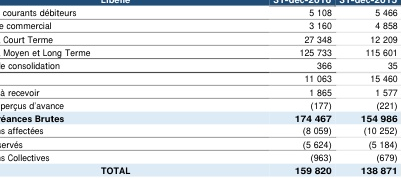

In [33]:
def objects_to_crops(img, tokens, objects, class_thresholds, padding=10):
    """
    Process the bounding boxes produced by the table detection model into
    cropped table images and cropped tokens.
    """

    table_crops = []
    for obj in objects:
        if obj['score'] < class_thresholds[obj['label']]:
            continue

        cropped_table = {}

        bbox = obj['bbox']
        bbox = [bbox[0]-padding, bbox[1]-padding, bbox[2]+padding, bbox[3]+padding]

        cropped_img = img.crop(bbox)

        table_tokens = [token for token in tokens if  (token['bbox'], bbox) >= 0.5]
        for token in table_tokens:
            token['bbox'] = [token['bbox'][0]-bbox[0],
                             token['bbox'][1]-bbox[1],
                             token['bbox'][2]-bbox[0],
                             token['bbox'][3]-bbox[1]]

        # If table is predicted to be rotated, rotate cropped image and tokens/words:
        if obj['label'] == 'table rotated':
            cropped_img = cropped_img.rotate(270, expand=True)
            for token in table_tokens:
                bbox = token['bbox']
                bbox = [cropped_img.size[0]-bbox[3]-1,
                        bbox[0],
                        cropped_img.size[0]-bbox[1]-1,
                        bbox[2]]
                token['bbox'] = bbox

        cropped_table['image'] = cropped_img
        cropped_table['tokens'] = table_tokens

        table_crops.append(cropped_table)

    return table_crops

print(objects)

# to view corp tables
tokens = []
detection_class_thresholds = {
    "table": 0.5,
    "table rotated": 0.5,
    "no object": 10
}
crop_padding = 10

tables_crops = objects_to_crops(image, tokens, objects, detection_class_thresholds, padding=0)
cropped_table = tables_crops[0]['image'].convert("RGB")
cropped_table

In [34]:
from transformers import TableTransformerForObjectDetection

structure_model = AutoModelForObjectDetection.from_pretrained("bilguun/table-transformer-structure-recognition")
structure_model.to(device)
print("")

structure_model.config.id2label

structure_transform = transforms.Compose([
    MaxResize(1000),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

pixel_values = structure_transform(cropped_table).unsqueeze(0)
pixel_values = pixel_values.to(device)
print(pixel_values.shape)

with torch.no_grad():
  outputs = structure_model(pixel_values)

structure_id2label = structure_model.config.id2label
structure_id2label[len(structure_id2label)] = "no object"

cells = outputs_to_objects(outputs, cropped_table.size, structure_id2label)
print(cells)

c:\Users\kortb\Desktop\BFI\env\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kortb\.cache\huggingface\hub\models--bilguun--table-transformer-structure-recognition. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)



torch.Size([1, 3, 444, 1000])
[{'label': 'table row', 'score': 0.9999327659606934, 'bbox': [0.15864595770835876, 45.56499481201172, 399.90631103515625, 58.737789154052734]}, {'label': 'table column', 'score': 0.9760969877243042, 'bbox': [218.68724060058594, 5.504014492034912, 343.7364501953125, 176.70404052734375]}, {'label': 'table row', 'score': 0.9995542168617249, 'bbox': [0.2162245810031891, 18.547760009765625, 399.8163146972656, 32.004417419433594]}, {'label': 'table column', 'score': 0.9994331002235413, 'bbox': [343.601806640625, 5.33961296081543, 399.73651123046875, 176.625732421875]}, {'label': 'table row', 'score': 0.9998941421508789, 'bbox': [0.030522167682647705, 85.25239562988281, 399.85986328125, 98.53974151611328]}, {'label': 'table column header', 'score': 0.6071341633796692, 'bbox': [0.28675779700279236, 5.080564498901367, 399.7439270019531, 19.197282791137695]}, {'label': 'table row', 'score': 0.9999364614486694, 'bbox': [0.20095154643058777, 32.0844612121582, 399.871

In [35]:
def get_cell_coordinates_by_row(table_data):
    rows = [entry for entry in table_data if entry['label'] == 'table row']
    columns = [entry for entry in table_data if entry['label'] == 'table column']

    rows.sort(key=lambda x: x['bbox'][1])
    columns.sort(key=lambda x: x['bbox'][0])

    def find_cell_coordinates(row, column):
        cell_bbox = [column['bbox'][0], row['bbox'][1], column['bbox'][2], row['bbox'][3]]
        return cell_bbox

    cell_coordinates = []

    for row in rows:
        row_cells = []
        for column in columns:
            cell_bbox = find_cell_coordinates(row, column)
            row_cells.append({'column': column['bbox'], 'cell': cell_bbox})

        row_cells.sort(key=lambda x: x['column'][0])

        cell_coordinates.append({'row': row['bbox'], 'cells': row_cells, 'cell_count': len(row_cells)})

    cell_coordinates.sort(key=lambda x: x['row'][1])

    return cell_coordinates

cell_coordinates = get_cell_coordinates_by_row(cells)

In [36]:
cell_coordinates

[{'row': [-0.031753093004226685,
   5.0415568351745605,
   399.77398681640625,
   177.17698669433594],
  'cells': [{'column': [-2.280283212661743,
     5.018045902252197,
     237.66763305664062,
     177.47500610351562],
    'cell': [-2.280283212661743,
     5.0415568351745605,
     237.66763305664062,
     177.17698669433594]},
   {'column': [218.68724060058594,
     5.504014492034912,
     343.7364501953125,
     176.70404052734375],
    'cell': [218.68724060058594,
     5.0415568351745605,
     343.7364501953125,
     177.17698669433594]},
   {'column': [343.601806640625,
     5.33961296081543,
     399.73651123046875,
     176.625732421875],
    'cell': [343.601806640625,
     5.0415568351745605,
     399.73651123046875,
     177.17698669433594]}],
  'cell_count': 3},
 {'row': [0.23983922600746155,
   5.047262668609619,
   399.67938232421875,
   18.716707229614258],
  'cells': [{'column': [-2.280283212661743,
     5.018045902252197,
     237.66763305664062,
     177.47500610351562

In [37]:
# num_rows = len(cell_coordinates)

num_columns = len(cell_coordinates[0]['cells'])

# print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of columns: 3


In [38]:
from huggingface_hub import hf_hub_download
from transformers import AutoImageProcessor, TableTransformerForObjectDetection
import torch
from PIL import Image

file_path = 'cropped_table.jpeg'
image = Image.open(file_path).convert("RGB")


image_processor = AutoImageProcessor.from_pretrained("bilguun/table-transformer-structure-recognition")
model = AutoModelForObjectDetection.from_pretrained("bilguun/table-transformer-structure-recognition")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)
num_rows=0
# convert outputs (bounding boxes and class logits) to Pascal VOC format (xmin, ymin, xmax, ymax)
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[
    0
]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    if(model.config.id2label[label.item()])=="table row":
        num_rows+=1
print(num_rows)

c:\Users\kortb\Desktop\BFI\env\Lib\site-packages\transformers\models\detr\feature_extraction_detr.py:38: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(


19


In [39]:
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 19
Number of columns: 3


In [40]:
df = pd.DataFrame(np.nan, index=np.arange(num_rows), columns=np.arange(num_columns))

In [41]:
import json
import pandas as pd

with open('new_Ocr2.json', 'r', encoding="utf-8") as file:
    json_data = json.load(file)


values = json_data['concatenated_values']

data = [values[i:i+num_columns] for i in range(0, len(values), num_columns)]

df = pd.DataFrame(data)
print(df)



                                  0                                    1                                                  2
0                           Libelle                          31-déc-2016                                        31-déc-2015
1                                        courants debiteurs a commercial                           a commercial Court Terme
2   Court Terme Moyen et Long Terme  Moyen et Long Terme e consolidation                                       51 108 3 160
3                      3 160 27 348                       27 348 125 733                                        125 733 366
4                        366 11 063                         11 063 1 865                                        1 865 (177)
5                     (177) 174 467                      174 467 (8 059)                                    (8 059) (5 624)
6                     (5 624) (963)                        (963) 159 820                                        5 466 4 858
7       